In [1]:
# Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/alantrs/machine-learning/main/cars.csv'
data = pd.read_csv(url, sep = ',')
data.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
#Tratamento dos dados
# Renomeia as colunas
data = data.rename(columns=lambda x: x.strip())

data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data['brand'] = data['brand'].map({' US.': 1, ' Europe.': 2, ' Japan.': 3})

# Substituir espaços em branco por NaN
data.replace(' ', np.nan, inplace=True)

# Remover registros que possuem valores NaN
data.dropna(subset=data.columns, inplace=True)

# Converter colunas para float
for coluna in data.columns:
    data[coluna] = data[coluna].astype(int)

# Verificar o DataFrame após a limpeza
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   mpg          256 non-null    int64
 1   cylinders    256 non-null    int64
 2   cubicinches  256 non-null    int64
 3   hp           256 non-null    int64
 4   weightlbs    256 non-null    int64
 5   time-to-60   256 non-null    int64
 6   year         256 non-null    int64
 7   brand        256 non-null    int64
dtypes: int64(8)
memory usage: 18.0 KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14,8,350,165,4209,12,1972,1
1,31,4,89,71,1925,14,1980,2
2,17,8,302,140,3449,11,1971,1
3,15,8,400,150,3761,10,1971,1
4,30,4,98,63,2051,17,1978,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

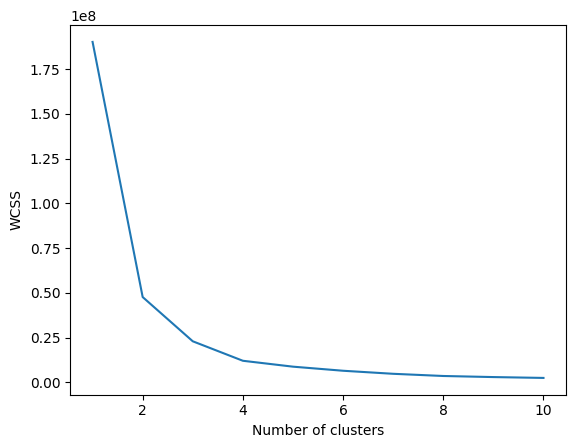

In [5]:
# Instanciamento do kmeans
# Metodo do cotovelo
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# fit
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
model.fit(data)
group = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# definicao de componetnes principais com PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

col_name = [x for x in data.columns]
pca = PCA()
_ = pca.fit_transform(data[col_name])
PC_components = np.arange(pca.n_components_) + 1

In [9]:
# Separacao de 3 componetnes principais
pca = PCA(n_components=3)
pca_array = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head(5)

,PC1,PC2,PC3,group
0,1213.107682,7.685162,6.751694,1
1,-1087.722826,18.591209,2.902431,0
2,452.394868,49.964470,-0.968574,2
3,773.959309,105.988631,-23.475976,1
4,-961.974917,8.626822,-7.709205,0


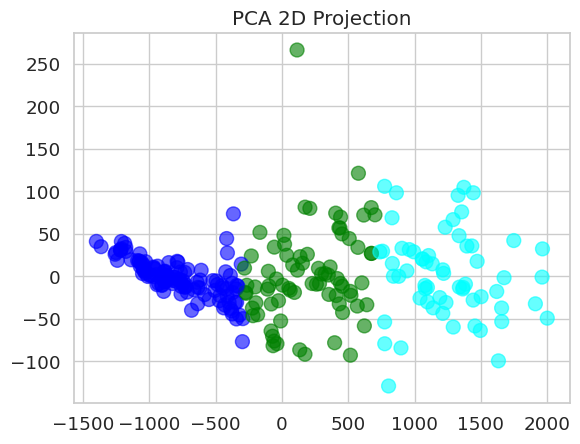

In [10]:
# Plotagem do agrupamento 2D
colors = ['blue', 'cyan', 'green', 'red', 'orange']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha = 0.6, s=100)
plt.title('PCA 2D Projection')
plt.show()

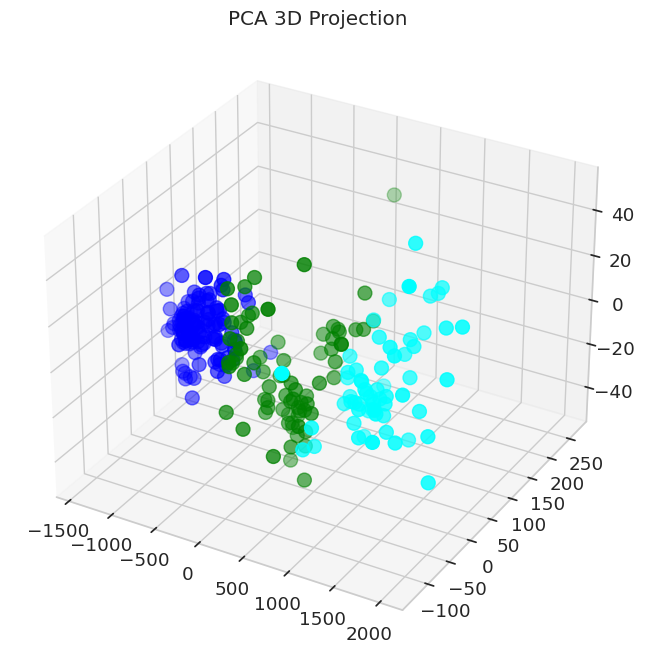

In [11]:
#
from mpl_toolkits import mplot3d

colors = ['blue', 'cyan', 'green', 'red', 'orange']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['color'], s=100)
ax.set_title('PCA 3D Projection')

plt.show()